In [ ]:
%matplotlib inline

In [ ]:
import pickle
#import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from statistics import mean, stdev
SPINE_COLOR = 'gray'

In [64]:
one_d = pickle.load(open('1d_copy.p', 'rb'))
sphere_var_elements = pickle.load(open('sphere_var_elements2_copy.p', 'rb'))
sphere_var_dimensions = pickle.load(open('sphere_var_dimensions2_copy.p', 'rb'))
rect_var_elements = pickle.load(open('variable_elements_copy.p', 'rb'))
rect_var_dimensions = pickle.load(open('variable_dimensions_copy.p', 'rb'))
contained_var_elements = pickle.load(open('contained_variable_elements2_copy.p', 'rb'))
contained_var_dimensions = pickle.load(open('contained_variable_dimensions2_copy.p', 'rb'))

In [65]:
def add_thing(new, to):
    for di, d in enumerate(to):
        d.append(new[di][0])

In [66]:
a = rect_var_elements.copy()
b = rect_var_dimensions.copy()
a.append(contained_var_elements[0])
a.append(sphere_var_elements[0])
del a[3]
del b[0][3]
del b[1][3]
del b[2][3]
del b[3][3]
del b[4][3]
add_thing(contained_var_dimensions, b)
add_thing(sphere_var_dimensions, b)

In [67]:
def convert_pickle_kd_b(b):
    for di, d in enumerate(b):
        for fi, f in enumerate(d):   
            fname = f[0]
            fvalues = f[1][0]
            n_size = fvalues[0]
            results = fvalues[1]
            t = [j.average for j in results]
            b[di][fi][1][0] = list(b[di][fi][1][0])
            b[di][fi][1][0][1] = (n_size, mean(t), stdev(t))
convert_pickle_kd_b(b)

In [68]:
def convert_pickle_kd_a(a):
    for fi, f in enumerate(a):
        fname = f[0]
        fvalues = f[1]
        for ni, n in enumerate(fvalues):
            n_size = n[0]
            results = n[1]
            #print(a[fi][1][ni])
            a[fi][1][ni] = list(a[fi][1][ni])
            t = [j.average for j in results]
            a[fi][1][ni][1] = (n_size, mean(t), stdev(t))
convert_pickle_kd_a(a)

In [69]:
a

[('bruteforce',
  [[10, (10, 1.5196731604800052e-05, 6.014807313210483e-06)],
   [100, (100, 0.00011570553188299971, 1.9832830284412457e-05)],
   [1000, (1000, 0.0012354073529700054, 0.00030441134767908743)],
   [10000, (10000, 0.014875696418600136, 0.009547875531788189)],
   [100000, (100000, 0.1239973396360034, 0.028654926588300978)],
   [1000000, (1000000, 1.148505952819976, 0.2090145249811459)]]),
 ('build_kd_tree',
  [[10, (10, 3.469425770700127e-05, 3.3995542608995982e-06)],
   [100, (100, 0.00038969024273998685, 2.7795542501458446e-05)],
   [1000, (1000, 0.004840486385099962, 0.00014528815783748246)],
   [10000, (10000, 0.07023971510800152, 0.020993215531253443)],
   [100000, (100000, 0.9435405175800042, 0.1284829492741191)],
   [1000000, (1000000, 12.639535749439942, 2.912559247987584)]]),
 ('kd_tree_without_contained',
  [[10, (10, 3.455629791400043e-05, 1.0740921157516236e-05)],
   [100, (100, 0.00015506291357202828, 0.0001059814737293106)],
   [1000, (1000, 0.000825069066972

In [70]:
b

[[('bruteforce',
   [[100000, (100000, 0.10549748071500926, 0.009939199224064808)]]),
  ('build_kd_tree',
   [[100000, (100000, 0.912642904739987, 0.24488641593173927)]]),
  ('kd_tree_without_contained',
   [[100000, (100000, 0.0664985622298723, 0.10532987962004121)]]),
  ('kd_tree_with_contained',
   [[100000, (100000, 0.02077155092942043, 0.02189858632998331)]]),
  ('sphere_query',
   [[100000, (100000, 0.11382191446194294, 0.08039853084195296)]])],
 [('bruteforce',
   [[100000, (100000, 0.1757524517799793, 0.11793449327582488)]]),
  ('build_kd_tree',
   [[100000, (100000, 1.1150608790098886, 0.29225351460789584)]]),
  ('kd_tree_without_contained',
   [[100000, (100000, 0.03853880123550838, 0.05943820295703025)]]),
  ('kd_tree_with_contained',
   [[100000, (100000, 0.018660622409300175, 0.02684408477721609)]]),
  ('sphere_query',
   [[100000, (100000, 0.09856682099599877, 0.1094555891213545)]])],
 [('bruteforce',
   [[100000, (100000, 0.1238672323420251, 0.03416792770147123)]]),
  ('

In [89]:
def convert_pickle(b):
    # where b in the pickle result
    for ini, i in enumerate(b):
        name = i[0]
        name_values = i[1]
        for jnj, j in enumerate(name_values):
            number = j[0]
            number_values = [e.average for e in j[1]]
            b[ini][1][jnj] = (number, mean(number_values), stdev(number_values))

In [116]:
#rect_var_dimensions[0][1]
#sphere_var_elements
#scale, values = one_d[0][1][0]
#convert_pickle(one_d)
one_d

[('naive_bench',
  [(10, 2.1113665823499948e-06, 8.186550267610567e-07),
   (100, 9.661823961800007e-06, 2.162026220025062e-06),
   (1000, 8.922735439999929e-05, 2.404188389697043e-05),
   (10000, 0.0008531370340999979, 0.00021866656846904615),
   (100000, 0.008943836117400008, 0.00244683206768496),
   (1000000, 0.09416806568699974, 0.025363035394706752)]),
 ('build_range_tree',
  [(10, 2.2296960175700723e-05, 4.4094347078211776e-06),
   (100, 0.0002648939390999999, 5.53839494508859e-05),
   (1000, 0.002602698680599838, 0.0004255354131644634),
   (10000, 0.030560134833001937, 0.005196249127203397),
   (100000, 0.35642059829000344, 0.07026626952749711),
   (1000000, 3.362513252219985, 0.2964072667276504)]),
 ('build_sorted_list',
  [(10, 1.4823817103400415e-06, 1.7436236090034768e-07),
   (100, 6.685809284399875e-06, 1.1151551527605726e-06),
   (1000, 0.00013032276689000128, 1.6440103786313492e-05),
   (10000, 0.0019676053830700447, 0.0003682412834082919),
   (100000, 0.0236025745811994

In [149]:
def replace(a):
    for fi, f in enumerate(a):
        fname = f[0]
        fvals = f[1]
        for ni, n in enumerate(fvals):
            fvals[ni] = n[1]

            
#            fvals[0] = n[]
#        print(f[1])
#        print(f[1][1])
#        f[1] = f[1][1]
        

In [150]:
replace(a)

In [223]:
def replace2(a):
    for di, d in enumerate(a):
        print(d)
        for fi, f in enumerate(d):
#            d[fi] = list(d[fi])
#            print(f)
            print(f)
#            f[1] = f[1][0]
replace2(b)

[['bruteforce', (100000, 0.10549748071500926, 0.009939199224064808)], ['build_kd_tree', (100000, 0.912642904739987, 0.24488641593173927)], ['kd_tree_without_contained', (100000, 0.0664985622298723, 0.10532987962004121)], ['kd_tree_with_contained', (100000, 0.02077155092942043, 0.02189858632998331)], ['sphere_query', (100000, 0.11382191446194294, 0.08039853084195296)]]
['bruteforce', (100000, 0.10549748071500926, 0.009939199224064808)]
['build_kd_tree', (100000, 0.912642904739987, 0.24488641593173927)]
['kd_tree_without_contained', (100000, 0.0664985622298723, 0.10532987962004121)]
['kd_tree_with_contained', (100000, 0.02077155092942043, 0.02189858632998331)]
['sphere_query', (100000, 0.11382191446194294, 0.08039853084195296)]
[['bruteforce', (100000, 0.1757524517799793, 0.11793449327582488)], ['build_kd_tree', (100000, 1.1150608790098886, 0.29225351460789584)], ['kd_tree_without_contained', (100000, 0.03853880123550838, 0.05943820295703025)], ['kd_tree_with_contained', (100000, 0.01866

In [249]:
def new_one(old):
    new = [
           ('bruteforce', []),
           ('build_kd_tree', []),
           ('kd_tree_without_contained', []),
           ('kd_tree_with_contained', []),
           ('sphere_query', [] )
          ]
    dims = [2,3,5,10,50]
    for di, d in enumerate(old):
        for fi, f in enumerate(d):
            print(old[fi][di][1])
            t = list(old[fi][di][1])
            t[0] = dims[fi]
            new[di][1].append(t)
    return new
c=new_one(b)
c

(100000, 0.10549748071500926, 0.009939199224064808)
(100000, 0.1757524517799793, 0.11793449327582488)
(100000, 0.1238672323420251, 0.03416792770147123)
(100000, 0.14020322968701113, 0.03818920813188577)
(100000, 0.13637361525000596, 0.024804942548742548)
(100000, 0.912642904739987, 0.24488641593173927)
(100000, 1.1150608790098886, 0.29225351460789584)
(100000, 1.3385497237400705, 1.396103858795075)
(100000, 1.30234298021016, 0.47489478650314065)
(100000, 1.1223229778600763, 0.22900487779162096)
(100000, 0.0664985622298723, 0.10532987962004121)
(100000, 0.03853880123550838, 0.05943820295703025)
(100000, 0.010357996326623124, 0.012647765346307193)
(100000, 0.009444430529026885, 0.014509990341530905)
(100000, 0.027157543341697964, 0.03783161763039317)
(100000, 0.02077155092942043, 0.02189858632998331)
(100000, 0.018660622409300175, 0.02684408477721609)
(100000, 0.02203543172353849, 0.062226819345444634)
(100000, 0.011243455422729856, 0.01901157159934346)
(100000, 0.032422564846629684, 0.0

[('bruteforce',
  [[2, 0.10549748071500926, 0.009939199224064808],
   [3, 0.1757524517799793, 0.11793449327582488],
   [5, 0.1238672323420251, 0.03416792770147123],
   [10, 0.14020322968701113, 0.03818920813188577],
   [50, 0.13637361525000596, 0.024804942548742548]]),
 ('build_kd_tree',
  [[2, 0.912642904739987, 0.24488641593173927],
   [3, 1.1150608790098886, 0.29225351460789584],
   [5, 1.3385497237400705, 1.396103858795075],
   [10, 1.30234298021016, 0.47489478650314065],
   [50, 1.1223229778600763, 0.22900487779162096]]),
 ('kd_tree_without_contained',
  [[2, 0.0664985622298723, 0.10532987962004121],
   [3, 0.03853880123550838, 0.05943820295703025],
   [5, 0.010357996326623124, 0.012647765346307193],
   [10, 0.009444430529026885, 0.014509990341530905],
   [50, 0.027157543341697964, 0.03783161763039317]]),
 ('kd_tree_with_contained',
  [[2, 0.02077155092942043, 0.02189858632998331],
   [3, 0.018660622409300175, 0.02684408477721609],
   [5, 0.02203543172353849, 0.062226819345444634]

In [229]:
a

[('bruteforce',
  [(10, 1.5196731604800052e-05, 6.014807313210483e-06),
   (100, 0.00011570553188299971, 1.9832830284412457e-05),
   (1000, 0.0012354073529700054, 0.00030441134767908743),
   (10000, 0.014875696418600136, 0.009547875531788189),
   (100000, 0.1239973396360034, 0.028654926588300978),
   (1000000, 1.148505952819976, 0.2090145249811459)]),
 ('build_kd_tree',
  [(10, 3.469425770700127e-05, 3.3995542608995982e-06),
   (100, 0.00038969024273998685, 2.7795542501458446e-05),
   (1000, 0.004840486385099962, 0.00014528815783748246),
   (10000, 0.07023971510800152, 0.020993215531253443),
   (100000, 0.9435405175800042, 0.1284829492741191),
   (1000000, 12.639535749439942, 2.912559247987584)]),
 ('kd_tree_without_contained',
  [(10, 3.455629791400043e-05, 1.0740921157516236e-05),
   (100, 0.00015506291357202828, 0.0001059814737293106),
   (1000, 0.0008250690669720043, 0.0009437127536880637),
   (10000, 0.0071224123341114476, 0.011213238147392581),
   (100000, 0.06172434393538279, 0.

In [246]:
c

[('bruteforce',
  [(100000, 0.10549748071500926, 0.009939199224064808),
   (100000, 0.1757524517799793, 0.11793449327582488),
   (100000, 0.1238672323420251, 0.03416792770147123),
   (100000, 0.14020322968701113, 0.03818920813188577),
   (100000, 0.13637361525000596, 0.024804942548742548)]),
 ('build_kd_tree',
  [(100000, 0.912642904739987, 0.24488641593173927),
   (100000, 1.1150608790098886, 0.29225351460789584),
   (100000, 1.3385497237400705, 1.396103858795075),
   (100000, 1.30234298021016, 0.47489478650314065),
   (100000, 1.1223229778600763, 0.22900487779162096)]),
 ('kd_tree_without_contained',
  [(100000, 0.0664985622298723, 0.10532987962004121),
   (100000, 0.03853880123550838, 0.05943820295703025),
   (100000, 0.010357996326623124, 0.012647765346307193),
   (100000, 0.009444430529026885, 0.014509990341530905),
   (100000, 0.027157543341697964, 0.03783161763039317)]),
 ('kd_tree_with_contained',
  [(100000, 0.02077155092942043, 0.02189858632998331),
   (100000, 0.018660622409

In [71]:
names = ["Bruteforce", "Build KD-tree", "KD-tree only intersection", "KD-tree with contained", "KD-tree with n-sphere range"] 
#names = ["Bruteforce", "Build Tree", "Sort Array", "Tree search", "Binary search"]

In [255]:
def draw_plot3(n, data, title):
    fig, ax = plt.subplots()
    for p,i in enumerate(data):
        plt.yscale('log')
#        print(i[1])
        err = np.array([e[2] for e in i[1]])
        v = np.array([e[1] for e in i[1]])
        a = np.array([str(e[0]) for e in i[1]])
#        print(err,'WOOT', v)
        print(a, v, err)
    # fmt='o', ecolor='g', capthick=2 
    # fmt='-|', elinewidth=10, barsabove=1
        ax.errorbar(a, v, err, fmt='o:', label=names[p], capsize=7)
    ax.legend()
    ax.set_xlabel("Amount of points")
    ax.set_ylabel("Seconds (log scale)")
    ax.set_title(title)
    width = 12.9
    format_axes(ax)
    latexify(width, width*(sqrt(5)-1.0)/2.0 )
    fig.savefig(f"{title}.png")
    plt.show()
#draw_plot(7, dis, "Time taken for a single 2d range search")

['2' '3' '5' '10' '50'] [0.10549748 0.17575245 0.12386723 0.14020323 0.13637362] [0.0099392  0.11793449 0.03416793 0.03818921 0.02480494]
['2' '3' '5' '10' '50'] [0.9126429  1.11506088 1.33854972 1.30234298 1.12232298] [0.24488642 0.29225351 1.39610386 0.47489479 0.22900488]
['2' '3' '5' '10' '50'] [0.06649856 0.0385388  0.010358   0.00944443 0.02715754] [0.10532988 0.0594382  0.01264777 0.01450999 0.03783162]
['2' '3' '5' '10' '50'] [0.02077155 0.01866062 0.02203543 0.01124346 0.03242256] [0.02189859 0.02684408 0.06222682 0.01901157 0.04162569]
['2' '3' '5' '10' '50'] [0.11382191 0.09856682 0.13819502 0.15975517 1.04908616] [0.08039853 0.10945559 0.20966017 0.2790758  2.23655214]


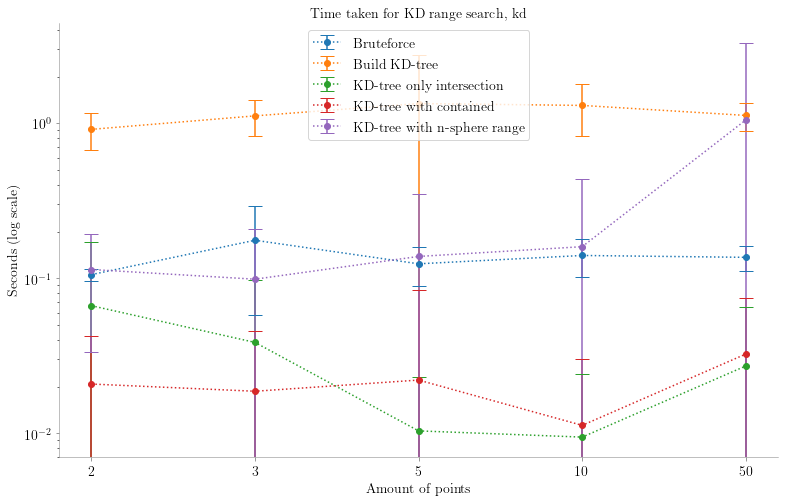

In [256]:
draw_plot3(6, c, "Time taken for KD range search, kd")

In [161]:
def draw_plot2(n, data, title):
    fig, ax = plt.subplots()
    a = [str(10**i) for i in range(1,n)]
    for p,i in enumerate(data):
        plt.yscale('log')
#        print(i[1])
        err = np.array([e[2] for e in i[1]])
        v = np.array([e[1] for e in i[1]])
#        print(err,'WOOT', v)
        print(a, v, err)
    # fmt='o', ecolor='g', capthick=2 
    # fmt='-|', elinewidth=10, barsabove=1
        ax.errorbar(a, v, err, fmt='o:', label=names[p], capsize=7)
    ax.legend()
    ax.set_xlabel("Amount of points")
    ax.set_ylabel("Seconds (log scale)")
    ax.set_title(title)
    width = 12.9
    format_axes(ax)
    latexify(width, width*(sqrt(5)-1.0)/2.0 )
    fig.savefig(f"{title}.png")
    plt.show()
#draw_plot(7, dis, "Time taken for a single 2d range search")

['10', '100', '1000', '10000', '100000', '1000000'] [1.51967316e-05 1.15705532e-04 1.23540735e-03 1.48756964e-02
 1.23997340e-01 1.14850595e+00] [6.01480731e-06 1.98328303e-05 3.04411348e-04 9.54787553e-03
 2.86549266e-02 2.09014525e-01]
['10', '100', '1000', '10000', '100000', '1000000'] [3.46942577e-05 3.89690243e-04 4.84048639e-03 7.02397151e-02
 9.43540518e-01 1.26395357e+01] [3.39955426e-06 2.77955425e-05 1.45288158e-04 2.09932155e-02
 1.28482949e-01 2.91255925e+00]
['10', '100', '1000', '10000', '100000', '1000000'] [3.45562979e-05 1.55062914e-04 8.25069067e-04 7.12241233e-03
 6.17243439e-02 6.51369245e-01] [1.07409212e-05 1.05981474e-04 9.43712754e-04 1.12132381e-02
 9.82447689e-02 1.00220606e+00]
['10', '100', '1000', '10000', '100000', '1000000'] [5.40110412e-05 1.95484362e-04 1.15392083e-03 3.18145017e-03
 3.16234232e-02 1.49861573e-01] [1.99423975e-05 1.31051360e-04 1.97761881e-03 3.35194364e-03
 5.73752689e-02 2.27679362e-01]
['10', '100', '1000', '10000', '100000', '100000

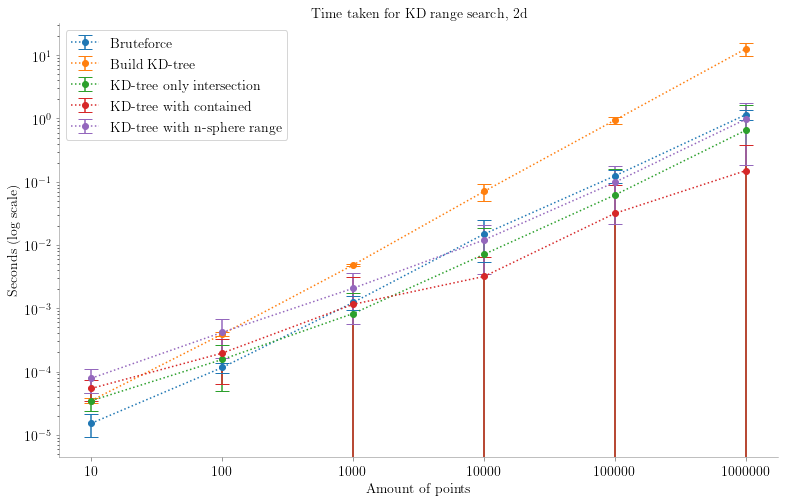

In [162]:
draw_plot2(7, a, "Time taken for KD range search, 2d")

In [ ]:
#draw_plot(7, one_d, "Time taken for a single 2d range search")

In [72]:
def draw_plot(n, data, title):
    fig, ax = plt.subplots()
    a = [str(10**i) for i in range(1,n)]
    for p,i in enumerate(data):
        plt.yscale('log')
        err = np.array([e[2] for e in i[1]])
        v = np.array([e[1] for e in i[1]])
#        print(err,'WOOT', v)
        print(v, err)
    # fmt='o', ecolor='g', capthick=2 
    # fmt='-|', elinewidth=10, barsabove=1
        ax.errorbar(a, v, err, fmt='o:', label=names[p], capsize=7)
    ax.legend()
    ax.set_xlabel("Amount of points")
    ax.set_ylabel("Seconds (log scale)")
    ax.set_title(title)
    width = 12.9
    format_axes(ax)
    latexify(width, width*(sqrt(5)-1.0)/2.0 )
    fig.savefig(f"{title}.png")
    plt.show()
#draw_plot(7, dis, "Time taken for a single 2d range search")

In [73]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 14, # fontsize for x and y labels (was 10)
              'axes.titlesize': 14,
#              'text.fontsize': 10, # was 10
              'legend.fontsize': 14, # was 10
              'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)
    return ax